<a href="https://colab.research.google.com/github/Jeevssss/Project-4-EV-One-Electric-Vehicle/blob/main/Project_4_EV_One_Electric_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import any necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv file
df = pd.read_csv('//content/ElectricCarData_Norm.csv')

In [3]:
# Showcase first 10 rows of dataset to get an overview
df.head(10)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8 sec,250 km/h,610 km,180 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6 sec,150 km/h,190 km,168 Wh/km,220 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1 sec,150 km/h,275 km,164 Wh/km,420 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6 sec,225 km/h,310 km,153 Wh/km,650 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3 sec,180 km/h,400 km,193 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,D,5,55000


In [4]:
# Check for null values
df.isnull().sum()

,0
Brand,0
Model,0
Accel,0
TopSpeed,0
Range,0
Efficiency,0
FastCharge,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [5]:
# Check for data types
df.dtypes

,0
Brand,object
Model,object
Accel,object
TopSpeed,object
Range,object
Efficiency,object
FastCharge,object
RapidCharge,object
PowerTrain,object
PlugType,object


In [6]:
# Removing units and convert it to int64
df['FastCharge'] =  df['FastCharge'].str.extract('(\d+)').fillna(0).astype(int)
df['Accel'] =  df['Accel'].str.replace(' sec', '').astype(float)
df['TopSpeed'] =  df['TopSpeed'].str.extract('(\d+)').astype(int)
df['Range'] =  df['Range'].str.extract('(\d+)').astype(int)
df['Efficiency'] =  df['Efficiency'].str.extract('(\d+)').astype(int)

# **Exploratory Data Analysis:**

1) Identify the car brands with the top speed?

2) Which model has the best efficiency?

3) Which car models produces the most number of cars?

4) Identify if there are any correlation between rapid charge and price?

**Task 1:**

- Identify the car brands with the top speed

**Explanation:**
1. The column 'TopSpeed' is sorted from the highest to lowest to determine which models from the three brands perform the best in Top Speed.

2. Out of ten models, six models belongs to Tesla and dominates the top three position among the other ten models.

3. The Roadster has a whooping speed of 400 Km/h







In [7]:
sort_speed = df.sort_values(by=['TopSpeed'], ascending=False)

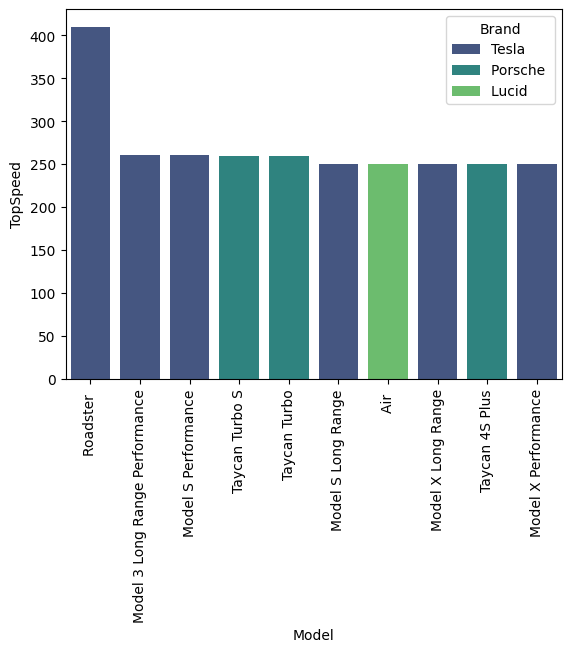

In [8]:
sns.barplot(x='Model', y='TopSpeed', data=sort_speed.head(10), palette='viridis', hue='Brand')
plt.xticks(rotation=90)
plt.show()

**Task 2:**

* Observing which model has the best efficiency

**Explanation:**


1. Although Tesla may dominate in terms of top speed but when it comes to efficiency, Mercedes performs better

2. However, Tesla's vehicles are still among the top 10 models while holding at least three electric vehicle amongst the five brands




In [9]:
sort_eff = df.sort_values(by=['Efficiency'], ascending=False)

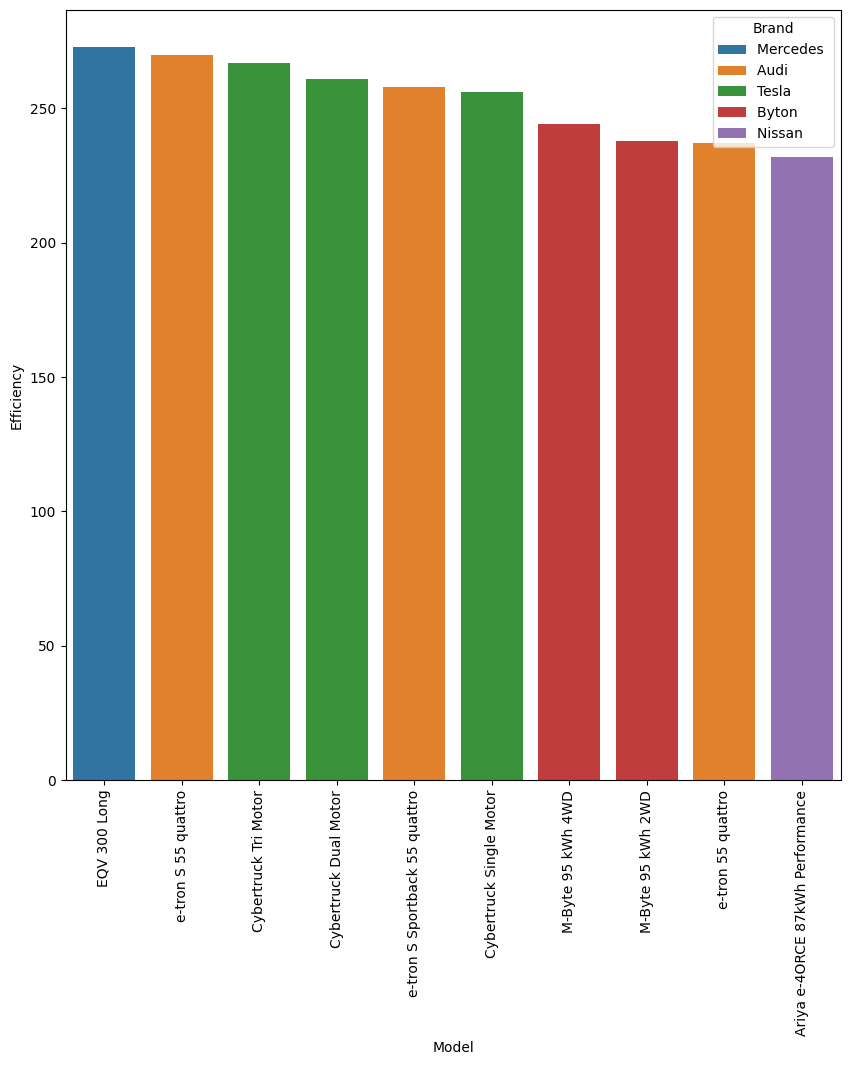

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x='Model', y='Efficiency', data=sort_eff.head(10), hue='Brand')
plt.xticks(rotation=90)
plt.show()

In [11]:
sorted = df.sort_values(by=['Efficiency'], ascending=False)
df_col = sorted[['Brand', 'Model', 'Efficiency']]
df_col.head(10)

,Brand,Model,Efficiency
84,Mercedes,EQV 300 Long,273
90,Audi,e-tron S 55 quattro,270
33,Tesla,Cybertruck Tri Motor,267
67,Tesla,Cybertruck Dual Motor,261
99,Audi,e-tron S Sportback 55 quattro,258
86,Tesla,Cybertruck Single Motor,256
73,Byton,M-Byte 95 kWh 4WD,244
102,Byton,M-Byte 95 kWh 2WD,238
50,Audi,e-tron 55 quattro,237
101,Nissan,Ariya e-4ORCE 87kWh Performance,232


**Task 3:**

* Identifying which brands produce the most number of cars

**Explanation:**

1. In the EV industry, the Tesla produces the most number of vehicles. This could be because they were the first players in the EV industry

2. This is then followed by Audi due to their famous e-tron EV vehicles

3. The rest of the brands are the upcoming underdogs in the EV industry bringing in the competition into the marker


<ipython-input-12-c0ec91eec073>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand', data=df, palette='rainbow', legend=False)


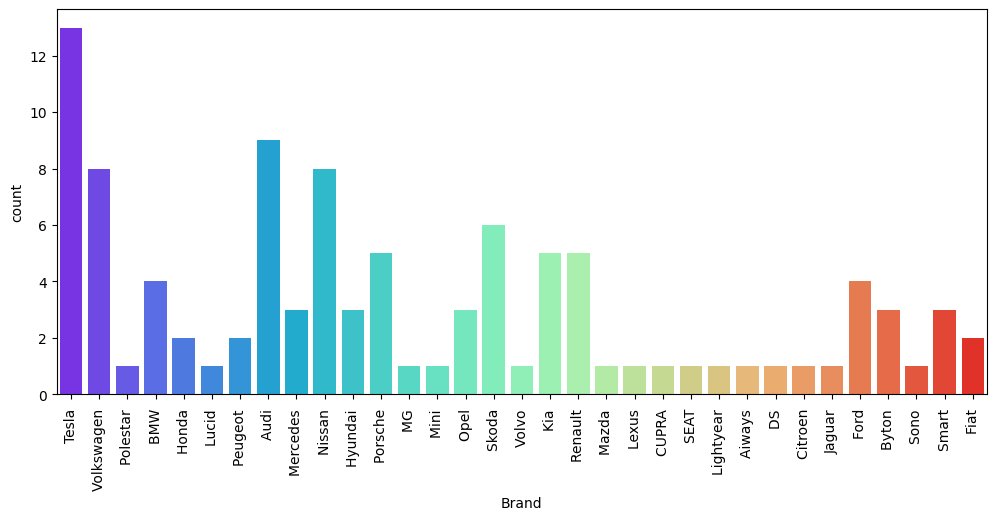

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x='Brand', data=df, palette='rainbow', legend=False)
plt.xticks(rotation=90)
plt.show()

**Task 4**

* Identify if there are any correlation between rapid charge and price

**Explanation**

1. Rapid Charge providing the luxury to charge the EV vehicles on a faster pace compared to the normal charging

2. Comparing the differences in terms of pricing of the vehicle, the median price of an EV vehicle with rapid charge would be around 45000 Euros

<ipython-input-13-293b53b0c5e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RapidCharge', y='PriceEuro', data=df, palette='rainbow')


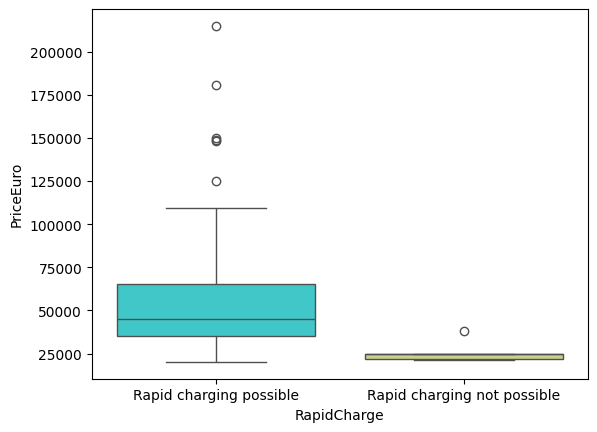

In [13]:
sns.boxplot(x='RapidCharge', y='PriceEuro', data=df, palette='rainbow')
plt.show()

In [14]:
sorted_acc = df.sort_values(by=['Accel'], ascending=True)
df_acc_col = sorted_acc[['Brand', 'Model', 'Accel']]
df_acc_col.head(10)

,Brand,Model,Accel
51,Tesla,Roadster,2.1
59,Tesla,Model S Performance,2.5
81,Tesla,Model X Performance,2.8
16,Porsche,Taycan Turbo S,2.8
5,Lucid,Air,2.8
33,Tesla,Cybertruck Tri Motor,3.0
79,Porsche,Taycan Turbo,3.2
24,Tesla,Model 3 Long Range Performance,3.4
72,Porsche,Taycan Cross Turismo,3.5
23,Audi,e-tron GT,3.5


## **Additonal Exploratory Data Analysis**

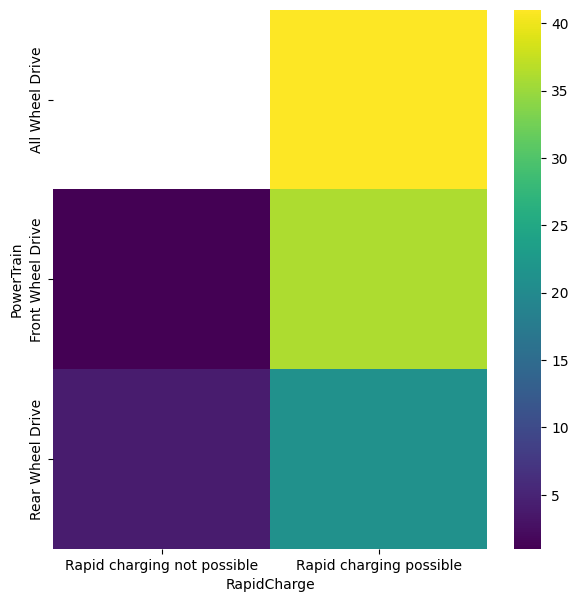

In [35]:
plt.subplots(figsize=(7, 7))
df_heatmap = pd.DataFrame({
    x_label: grp['PowerTrain'].value_counts()
    for x_label, grp in df.groupby('RapidCharge')
})
sns.heatmap(df_heatmap, cmap='viridis')
plt.xlabel('RapidCharge')
_ = plt.ylabel('PowerTrain')

<ipython-input-16-f1889e088289>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Seats', y='Segment', inner='stick', palette='Dark2')


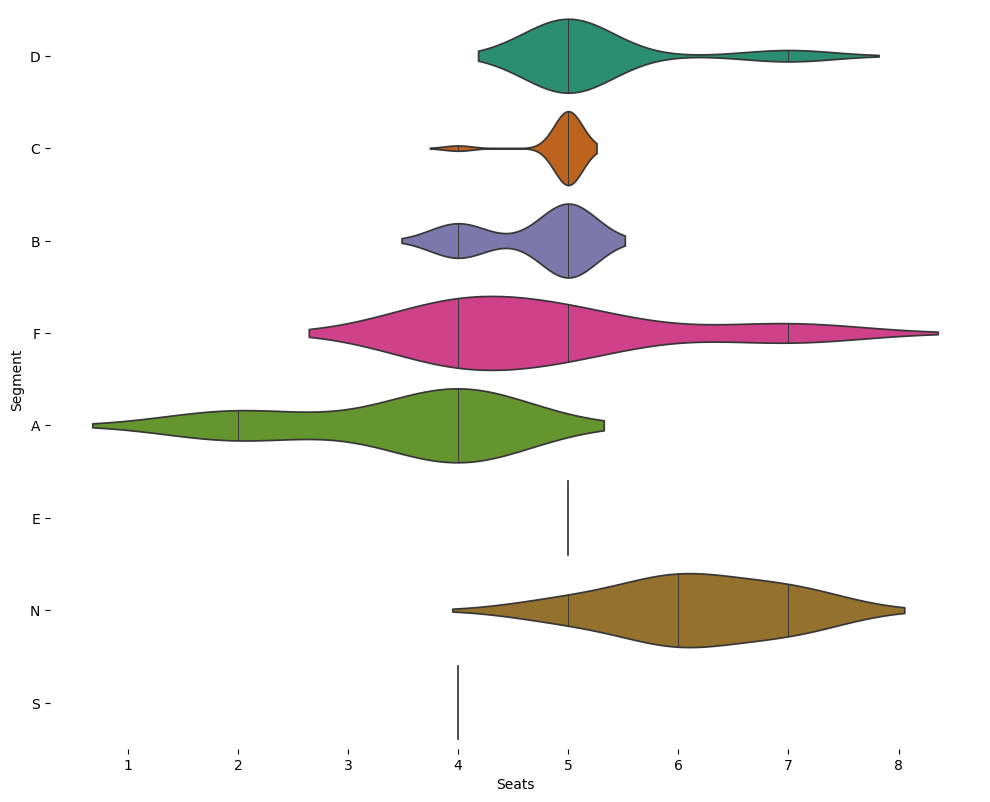

In [16]:
figsize = (12, 1.2 * len(df['Segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Seats', y='Segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Text(0.5, 1.0, 'Distribution of Car Prices by Brand')

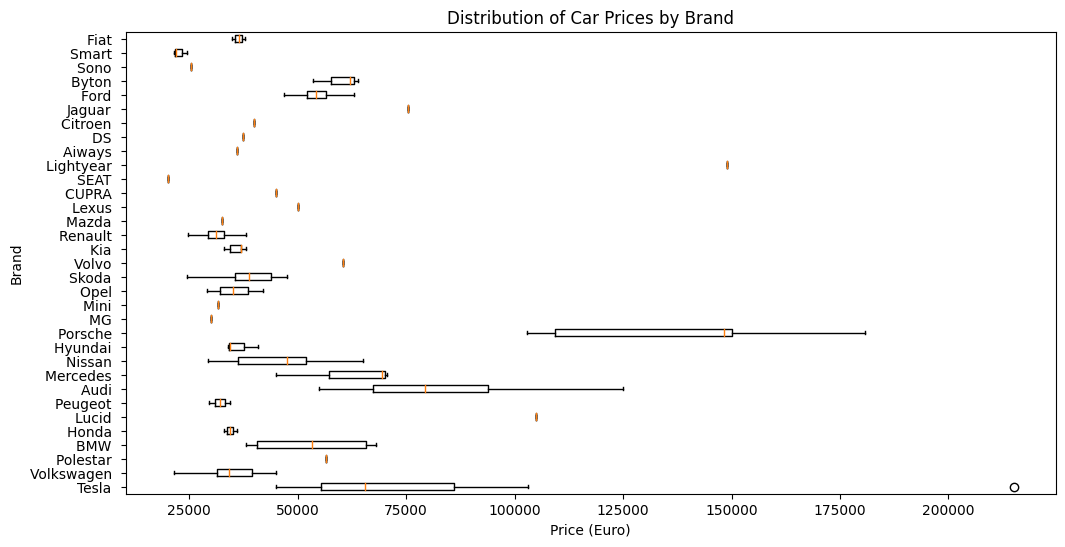

In [17]:
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Brand'] == brand]['PriceEuro'] for brand in df['Brand'].unique()], labels=df['Brand'].unique(), vert=False)
plt.xlabel('Price (Euro)')
plt.ylabel('Brand')
plt.title('Distribution of Car Prices by Brand')

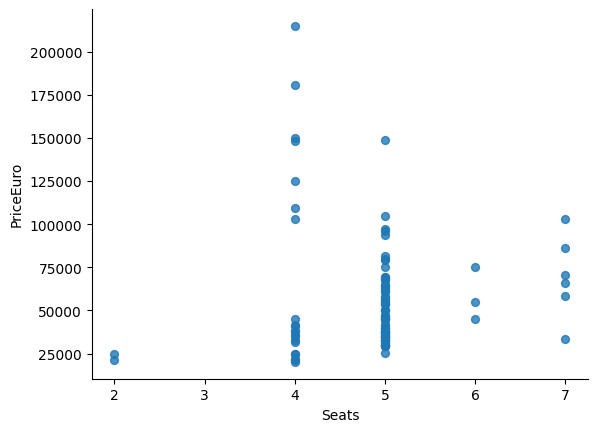

In [18]:
df.plot(kind='scatter', x='Seats', y='PriceEuro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-19-3a533cbdf455>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='BodyStyle', y='PriceEuro', inner='stick', palette='Dark2')


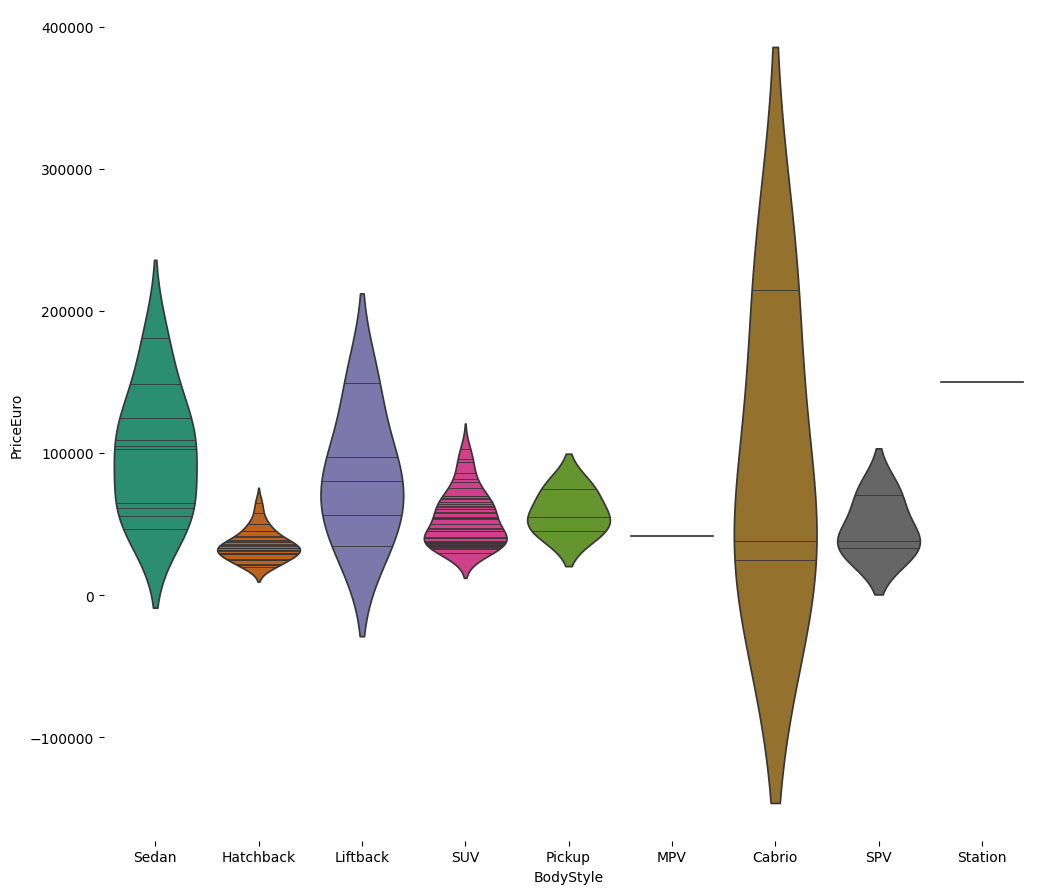

In [19]:
figsize = (12, 1.2 * len(df['BodyStyle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='BodyStyle', y='PriceEuro', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)